# **1. Simple Linear Regression**

**Task:** Predict student score given the number of hours spent by the student for studies  

**Input:** Hours studies  

**Output:** Score

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("w1_student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


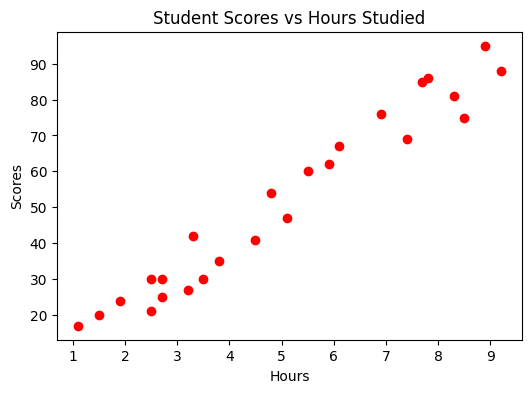

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(df["Hours"],df['Scores'], 'ro')
plt.title("Student Scores vs Hours Studied")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

### **Find Coefficients**

Calculate the mean of input and output

In [6]:
xmean = np.mean(df["Hours"])
ymean = np.mean(df["Scores"])

Calculate the terms needed for numerator and denominator of beta

In [7]:
df['xycov'] = (df['Hours'] - xmean) * (df['Scores'] - ymean)
df['xvar'] = (df['Hours'] - xmean)**2

Calculate the coefficients

In [8]:
slope = df['xycov'].sum() / df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f"slope = {slope}")
print(f"intercept = {intercept}")

slope = 9.775803390787473
intercept = 2.4836734053731817


### **Making Predictions**

In [10]:
intercept + slope*7

np.float64(70.9142971408855)

In [11]:
Scores_predicted = intercept + slope * df['Hours']

Compute the score of a student who studied for 7 hours

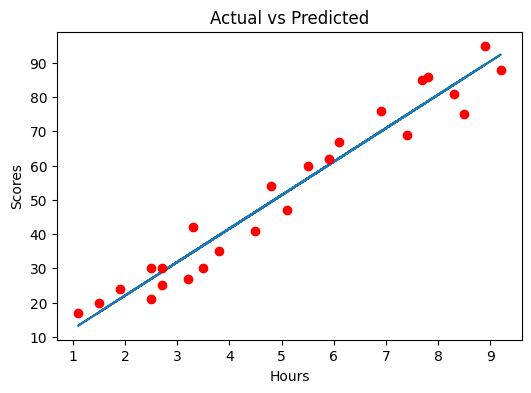

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(df["Hours"],Scores_predicted) # regression line
plt.plot(df["Hours"],df['Scores'], 'ro') # scatter plot shoeing actual data
plt.title("Actual vs Predicted")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

# **2. Multiple Linear Regression**

**Task:** Predict petrol consumption of a country given various factors such as tax, distance of highways, population with driving license  

**Input:** Tax, distance of highways, average income and population with driving license  

**Output:** Expected petrol consumption

In [14]:
df = pd.read_csv("w1_petrol_consumption.csv")

In [15]:
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [16]:
df.shape

(48, 5)

In [17]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


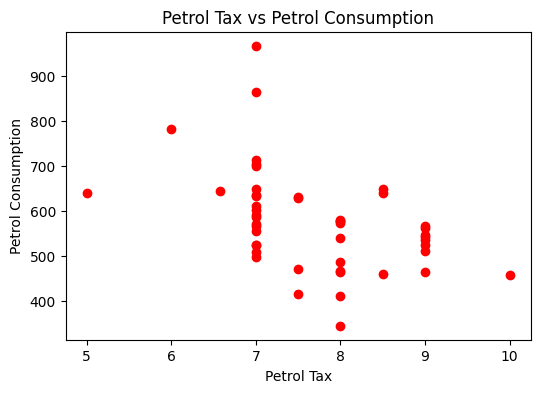

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(df['Petrol_tax'],df['Petrol_Consumption'], 'ro')
plt.title("Petrol Tax vs Petrol Consumption")
plt.xlabel("Petrol Tax")
plt.ylabel("Petrol Consumption")

plt.show()

Identify Outliers

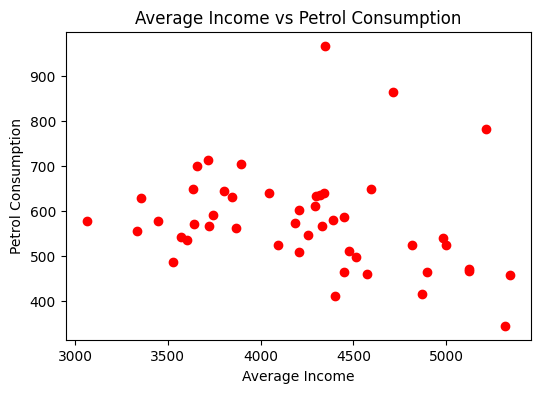

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(df['Average_income'],df['Petrol_Consumption'], 'ro')
plt.title("Average Income vs Petrol Consumption")
plt.xlabel("Average Income")
plt.ylabel("Petrol Consumption")

plt.show()

Train the model

In [22]:
Y = df['Petrol_Consumption']
X = df[['Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_tax']]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
regressor.intercept_

np.float64(361.45087906668397)

In [26]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

### **Make Predictions**

In [27]:
y_pred = regressor.predict(X_test)

In [29]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


### **Evaluating the model**

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error: {MAE: .2f}')
print(f'Mean Squared Error: {MSE: .2f}')
print(f'Root Mean Squared Error: {RMSE: .2f}')

Mean Absolute Error:  53.47
Mean Squared Error:  4083.26
Root Mean Squared Error:  63.90


In [31]:
regressor.score(X_test, y_test)

0.39136640014305457

In [32]:
regressor.score(X_train, y_train)

0.7068781342155135

Possible improvements:  


*   Increase the size of data
*   Try non-linear relation
*   May require more features



